In [ ]:
import numpy as np

In [ ]:
class linear_regression():
# initiating the hyper parameters learning_rate - step size of change in parameters
# no_of_iterations - how many times the model should be trained

  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate= learning_rate
    self.no_of_iterations=no_of_iterations

# fitting the data to the model
  def fit(self,x,y): # x-years_experience y-salary in the dataset we are using
    #no of training examples(datapoints) and no of features(1 that is x)
    # size of training samples and features are taken as m,n
    m,n = x.shape # m is number of examples (rows) and n is number of features(columns)
    # assigning m and n as the attributes of object (self)
    self.m=m  # rows
    self.n=n  # columns

    # initiating the weight and bias randomly (assigning zeros)
    self.w=np.zeros(self.n) # creating an array of size n and assigning zeros
    self.b=0

    self.x=x
    self.y=y

    # implementing gradient descent model
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_pred=self.predict(self.x)

    # calculating gradient
    dw= -(2*(self.x.T).dot(self.y-y_pred)) / self.m
    db= -2 * np.sum(self.y - y_pred) / self.m

    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,x):
    return x.dot(self.w)+ self.b

Using linear regression model for prediction

In [ ]:
# importing the libraries for processing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Data Pre processing

In [ ]:
# loading the data from csv to pandas dataframe\
salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
# chacking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# splitting data into features and targets
x= salary_data.iloc[:,:-1].values # removes the last column
y= salary_data.iloc[:,1].values

In [ ]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
# splitting data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=2)


In [ ]:
# training the linear regression model
model = linear_regression(learning_rate=0.02,no_of_iterations=1000)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
# printing the parameter values
print('weight =',model.w[0])
print('bias =',model.b)

weight = 9514.400999035135
bias = 23697.406507136307


In [ ]:
# predicting the salary for test data
test_data_pred=model.predict(x_test)
print(test_data_pred)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualising the predicted values and actual values

Text(0, 0.5, 'salary')

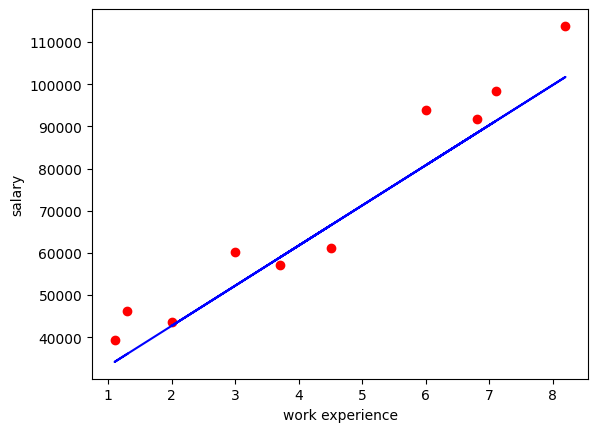

In [ ]:
plt.scatter(x_test,y_test, color ='red')
plt.plot(x_test, test_data_pred,color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')